In [256]:
!pip install contractions matplotlib pprint

ERROR: Could not find a version that satisfies the requirement pprint (from versions: none)
ERROR: No matching distribution found for pprint
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [257]:
import os
import pandas as pd
import pyarrow.parquet as pq
pd.set_option('display.max_colwidth', None)

In [258]:
source = f'../input/00sample100corpus/00-sample-100-corpus.parquet'
df = pq.read_table(source=source).to_pandas()
df.head()

,Id,Title,clean_snippets_body
2363368,52482102,How do I specify the keystore type on the command line?,"In the java.security file, you can specify the keystore.type value. However, that looks like it changes the default keystore type for all JVM instances. I just want to change it for one instance.\nCurrently, it is set to ""jks"", but I need it to be ""jceks"". I tried but that doesn't seem to do what I want it to do.\nWhat's the right way to do this?\n"
3482674,57011515,Cross-Origin Request Blocked: The Same Origin Policy disallows reading the remote resource not working,"I'm new to Laravel and have gone through several solutions on tackoverflow, but to no avail. It's still showing the same error of Cross-Origin Request Blocked.\n\nI also included this:\n\non my app.blade.php, but it still didn't work.\n"
3609986,51953516,form submit event handler refreshes the page + jQuery,"I made a template in index.html \n\nwhich is going to be used to append in another div five times.\n\nand the value of is passed to the on window load.\napp.js:\n\nAs a result it generates five templates and each template contains value of price. Now, when I click on submit button it is not triggering the event handler I set in . \n\nBut instead it refreshes the page and appends question mark on the url. ex: \nWhat's the problem here?\n"
7582175,59671419,None,"If you want to change for every value in Subset, you could just do \n\nor if you are just updating a smaller set of values from subset\n\n"
2631232,53771640,repeating set row values for unique column values,"the data format i have is as follows: \nWhen i use s2<- fill_(s1,c(""Time"")), it would use the last seen value..\nhowever i would like all values of time listed below to repeat for each value of Animal \n\n\n\n\n\n"


In [259]:
df['text'] = df['Title'].fillna('').str.strip() + ' ' + df['clean_snippets_body'].fillna('').str.strip()
df.head()

,Id,Title,clean_snippets_body,text
2363368,52482102,How do I specify the keystore type on the command line?,"In the java.security file, you can specify the keystore.type value. However, that looks like it changes the default keystore type for all JVM instances. I just want to change it for one instance.\nCurrently, it is set to ""jks"", but I need it to be ""jceks"". I tried but that doesn't seem to do what I want it to do.\nWhat's the right way to do this?\n","How do I specify the keystore type on the command line? In the java.security file, you can specify the keystore.type value. However, that looks like it changes the default keystore type for all JVM instances. I just want to change it for one instance.\nCurrently, it is set to ""jks"", but I need it to be ""jceks"". I tried but that doesn't seem to do what I want it to do.\nWhat's the right way to do this?"
3482674,57011515,Cross-Origin Request Blocked: The Same Origin Policy disallows reading the remote resource not working,"I'm new to Laravel and have gone through several solutions on tackoverflow, but to no avail. It's still showing the same error of Cross-Origin Request Blocked.\n\nI also included this:\n\non my app.blade.php, but it still didn't work.\n","Cross-Origin Request Blocked: The Same Origin Policy disallows reading the remote resource not working I'm new to Laravel and have gone through several solutions on tackoverflow, but to no avail. It's still showing the same error of Cross-Origin Request Blocked.\n\nI also included this:\n\non my app.blade.php, but it still didn't work."
3609986,51953516,form submit event handler refreshes the page + jQuery,"I made a template in index.html \n\nwhich is going to be used to append in another div five times.\n\nand the value of is passed to the on window load.\napp.js:\n\nAs a result it generates five templates and each template contains value of price. Now, when I click on submit button it is not triggering the event handler I set in . \n\nBut instead it refreshes the page and appends question mark on the url. ex: \nWhat's the problem here?\n","form submit event handler refreshes the page + jQuery I made a template in index.html \n\nwhich is going to be used to append in another div five times.\n\nand the value of is passed to the on window load.\napp.js:\n\nAs a result it generates five templates and each template contains value of price. Now, when I click on submit button it is not triggering the event handler I set in . \n\nBut instead it refreshes the page and appends question mark on the url. ex: \nWhat's the problem here?"
7582175,59671419,None,"If you want to change for every value in Subset, you could just do \n\nor if you are just updating a smaller set of values from subset\n\n","If you want to change for every value in Subset, you could just do \n\nor if you are just updating a smaller set of values from subset"
2631232,53771640,repeating set row values for unique column values,"the data format i have is as follows: \nWhen i use s2<- fill_(s1,c(""Time"")), it would use the last seen value..\nhowever i would like all values of time listed below to repeat for each value of Animal \n\n\n\n\n\n","repeating set row values for unique column values the data format i have is as follows: \nWhen i use s2<- fill_(s1,c(""Time"")), it would use the last seen value..\nhowever i would like all values of time listed below to repeat for each value of Animal"


In [260]:
import string
import re
import contractions

from gensim import utils
from gensim.parsing.preprocessing import strip_tags, strip_numeric, stem_text, strip_multiple_whitespaces, STOPWORDS, preprocess_string

# \b(?:Tarzan|Jane|Superman)\b|(\w+)
#RE_PUNCT = re.compile(r'([%s])+' % re.escape(string.punctuation), re.UNICODE)
PUNC = re.sub('\#', '', string.punctuation)
PUNC = re.sub('\++', '', PUNC)
RE_PUNCT = re.compile(r'([%s])+' % re.escape(PUNC), re.UNICODE)

WHITELIST = ['c++', 'c#','f#',' r ', 'c']

STOPWORDS_CUSTOM = STOPWORDS.union(set(['ive', 'instead', 'need', 'look', 'use', 'like', 'want', 'saying', 'thanks', 'think', 'tried', 'perfectly', 'probably', 'simp', 'unfortunately', 'therefor', 'people', 'mention', 'example', 'formed', 'thanks', 'know', 'soon', 'occur', 'assuming', 'keeps', 'based', 'new', 'way', 'work', 'follow', 'complete', 'miss', 'idea', 'cause', 'give', 'happen', 'wrong', 'regard', 'concern', 'take', 'long', 'according', 'high', 'deal', 'remain', 'total', 'matter', 'hope', 'appreciate', 'dont', 'hi', 'unable', 'person', 'hard', 'easier', 'sorry', 'mind', 'care', 'couldnt', 'wait', 'doesnt', 'welcome', 'wasnt', 'fresh', 'price', 'that', 'mat', 'outlook', 'wanna', 'weird', 'shouldnt', 'nearest', 'friend', 'upper', 'thousand', 'okay', 'near', 'anybody', 'guy', 'suit', 'today', 'offer', 'smooth', 'fault', 'talk', 'somebody', 'office', 'exceed', 'reply', 'inside', 'facing', 'kindly', 'perfectly', 'perfectly', 'doesen', 'fact', 'surely', 'sample', 'occurs', 'assume', 'earlier', 'able', 'reached', 'happy', 'grab', 'details', 'relevant', 'additional', 'needed', 'usually', 'trying', 'happening', 'fine', 'allows', 'sure', 'beginning']))

def replace_contractions(s):
    s = utils.to_unicode(s)
    """Replace contractions in string of text"""
    return contractions.fix(s)

def remove_URL(s):
    s = utils.to_unicode(s)
    """Remove URLs from a sample string"""
    return re.sub(r'https?://\S+', "", s)
    # return re.sub(r'https?://\S+', "", s)
    
def strip_punctuation_custom(s):
    """Replace punctuation characters with spaces in `s` using :const:`~gensim.parsing.preprocessing.RE_PUNCT`.
    Parameters
    ----------
    s : str
    Returns
    -------
    str
        Unicode string without punctuation characters.
    Examples
    --------
    .. sourcecode:: pycon
        >>> from gensim.parsing.preprocessing import strip_punctuation
        >>> strip_punctuation("A semicolon is a stronger break than a comma, but not as much as a full stop!")
        u'A semicolon is a stronger break than a comma  but not as much as a full stop '
    """
    s = utils.to_unicode(s)

    return RE_PUNCT.sub(" ", s)

def strip_short_custom(s, minsize=2):
    """Remove words with length lesser than `minsize` from `s`.
    Parameters
    ----------
    s : str
    minsize : int, optional
    Returns
    -------
    str
        Unicode string without short words.
    Examples
    --------
    .. sourcecode:: pycon
        >>> from gensim.parsing.preprocessing import strip_short
        >>> strip_short("salut les amis du 59")
        u'salut les amis'
        >>>
        >>> strip_short("one two three four five six seven eight nine ten", minsize=5)
        u'three seven eight'
    """
    s = utils.to_unicode(s)

    return " ".join(e for e in s.split() if e in WHITELIST or len(e) >= minsize)

def remove_stopwords_custom(s):
    """Remove :const:`~gensim.parsing.preprocessing.STOPWORDS` from `s`.
    Parameters
    ----------
    s : str
    Returns
    -------
    str
        Unicode string without :const:`~gensim.parsing.preprocessing.STOPWORDS`.
    Examples
    --------
    .. sourcecode:: pycon
        >>> from gensim.parsing.preprocessing import remove_stopwords
        >>> remove_stopwords("Better late than never, but better never late.")
        u'Better late never, better late.'
    """
    s = utils.to_unicode(s)
    return " ".join(w for w in s.split() if (w in WHITELIST or w not in STOPWORDS_CUSTOM))


CUSTOM_FILTERS = [lambda x: x.lower(), #lowercase
                  strip_tags,# remove xml/html tags
                  remove_URL,
                  replace_contractions,
                  strip_punctuation_custom,# remove punctuation
                  strip_multiple_whitespaces,# remove repeating whitespaces
                  strip_numeric, # remove numbers
                  remove_stopwords_custom, # remove stopwords
                  strip_short_custom # remove words less than minsize=3 characters long
                  #stem_text # return porter-stemmed text,
                 ]

def text_preprocess(post):
    return (preprocess_string(str(post), CUSTOM_FILTERS))  # deacc=True removes punctuations




In [261]:
df["text_preprocessed"] = df["text"].apply(text_preprocess)

In [262]:
df.head()

,Id,Title,clean_snippets_body,text,text_preprocessed
2363368,52482102,How do I specify the keystore type on the command line?,"In the java.security file, you can specify the keystore.type value. However, that looks like it changes the default keystore type for all JVM instances. I just want to change it for one instance.\nCurrently, it is set to ""jks"", but I need it to be ""jceks"". I tried but that doesn't seem to do what I want it to do.\nWhat's the right way to do this?\n","How do I specify the keystore type on the command line? In the java.security file, you can specify the keystore.type value. However, that looks like it changes the default keystore type for all JVM instances. I just want to change it for one instance.\nCurrently, it is set to ""jks"", but I need it to be ""jceks"". I tried but that doesn't seem to do what I want it to do.\nWhat's the right way to do this?","[specify, keystore, type, command, line, java, security, file, specify, keystore, type, value, looks, changes, default, keystore, type, jvm, instances, change, instance, currently, set, jks, jceks, right]"
3482674,57011515,Cross-Origin Request Blocked: The Same Origin Policy disallows reading the remote resource not working,"I'm new to Laravel and have gone through several solutions on tackoverflow, but to no avail. It's still showing the same error of Cross-Origin Request Blocked.\n\nI also included this:\n\non my app.blade.php, but it still didn't work.\n","Cross-Origin Request Blocked: The Same Origin Policy disallows reading the remote resource not working I'm new to Laravel and have gone through several solutions on tackoverflow, but to no avail. It's still showing the same error of Cross-Origin Request Blocked.\n\nI also included this:\n\non my app.blade.php, but it still didn't work.","[cross, origin, request, blocked, origin, policy, disallows, reading, remote, resource, working, laravel, gone, solutions, tackoverflow, avail, showing, error, cross, origin, request, blocked, included, app, blade, php]"
3609986,51953516,form submit event handler refreshes the page + jQuery,"I made a template in index.html \n\nwhich is going to be used to append in another div five times.\n\nand the value of is passed to the on window load.\napp.js:\n\nAs a result it generates five templates and each template contains value of price. Now, when I click on submit button it is not triggering the event handler I set in . \n\nBut instead it refreshes the page and appends question mark on the url. ex: \nWhat's the problem here?\n","form submit event handler refreshes the page + jQuery I made a template in index.html \n\nwhich is going to be used to append in another div five times.\n\nand the value of is passed to the on window load.\napp.js:\n\nAs a result it generates five templates and each template contains value of price. Now, when I click on submit button it is not triggering the event handler I set in . \n\nBut instead it refreshes the page and appends question mark on the url. ex: \nWhat's the problem here?","[form, submit, event, handler, refreshes, page, jquery, template, index, html, going, append, div, times, value, passed, window, load, app, js, result, generates, templates, template, contains, value, click, submit, button, triggering, event, handler, set, refreshes, page, appends, question, mark, url, ex, problem]"
7582175,59671419,None,"If you want to change for every value in Subset, you could just do \n\nor if you are just updating a smaller set of values from subset\n\n","If you want to change for every value in Subset, you could just do \n\nor if you are just updating a smaller set of values from subset","[change, value, subset, updating, smaller, set, values, subset]"
2631232,53771640,repeating set row values for unique column values,"the data format i have is as follows: \nWhen i use s2<- fill_(s1,c(""Time"")), it would use the last seen value..\nhowever i would like all values of time listed below to repeat for each value of Animal \n\n\n\n\n\n"

In [263]:
data = df.text.values.tolist()
data_words = df.text_preprocessed.values.tolist()
# data_words = list(data)
print(data_words[:1])

[['specify', 'keystore', 'type', 'command', 'line', 'java', 'security', 'file', 'specify', 'keystore', 'type', 'value', 'looks', 'changes', 'default', 'keystore', 'type', 'jvm', 'instances', 'change', 'instance', 'currently', 'set', 'jks', 'jceks', 'right']]


In [264]:
"""
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df.text.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])
"""

'\ndef sent_to_words(sentences):\n    for sent in sentences:\n        sent = re.sub(\'\\S*@\\S*\\s?\', \'\', sent)  # remove emails\n        sent = re.sub(\'\\s+\', \' \', sent)  # remove newline chars\n        sent = re.sub("\'", "", sent)  # remove single quotes\n        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) \n        yield(sent)  \n\n# Convert to list\ndata = df.text.values.tolist()\ndata_words = list(sent_to_words(data))\nprint(data_words[:1])\n'

In [265]:
import gensim
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [266]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [267]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

In [268]:
print(data_words_bigrams[:10])

[['specify', 'keystore', 'type', 'command', 'line', 'java', 'security', 'file', 'specify', 'keystore', 'type', 'value', 'looks', 'changes', 'default', 'keystore', 'type', 'jvm', 'instances', 'change', 'instance', 'currently', 'set', 'jks', 'jceks', 'right'], ['cross', 'origin', 'request', 'blocked', 'origin', 'policy', 'disallows', 'reading', 'remote', 'resource', 'working', 'laravel', 'gone', 'solutions', 'tackoverflow', 'avail', 'showing', 'error', 'cross', 'origin', 'request', 'blocked', 'included', 'app', 'blade', 'php'], ['form', 'submit', 'event', 'handler', 'refreshes', 'page', 'jquery', 'template', 'index', 'html', 'going', 'append', 'div', 'times', 'value', 'passed', 'window', 'load', 'app', 'js', 'result', 'generates', 'templates', 'template', 'contains', 'value', 'click', 'submit', 'button', 'triggering', 'event', 'handler', 'set', 'refreshes', 'page', 'appends', 'question', 'mark', 'url', 'ex', 'problem'], ['change', 'value', 'subset', 'updating', 'smaller', 'set', 'values'

In [269]:
import nltk 
nltk.download('wordnet') 
from nltk.stem import WordNetLemmatizer, SnowballStemmer 

import spacy

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [270]:
def lemmatize_stemming(texts):
    # print(texts)
    # print([text for text in texts])
    return [[stemmer.stem(WordNetLemmatizer().lemmatize(word, pos='v')) for word in text] for text in texts]
    #return [stemmer.stem(WordNetLemmatizer().lemmatize(' '.join(text), pos='v')) for text in texts]

In [271]:


# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

stemmer = SnowballStemmer("english")

data_ready = lemmatize_stemming(data_words_bigrams)

In [272]:
print(data_ready[:1])

[['specifi', 'keystor', 'type', 'command', 'line', 'java', 'secur', 'file', 'specifi', 'keystor', 'type', 'valu', 'look', 'chang', 'default', 'keystor', 'type', 'jvm', 'instanc', 'chang', 'instanc', 'current', 'set', 'jks', 'jcek', 'right']]


In [273]:
# Create Dictionary
from gensim.corpora import Dictionary
id2word = Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [274]:
print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 3), (18, 1)]]


In [275]:
id2word[0]

'chang'

In [276]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('chang', 2),
  ('command', 1),
  ('current', 1),
  ('default', 1),
  ('file', 1),
  ('instanc', 2),
  ('java', 1),
  ('jcek', 1),
  ('jks', 1),
  ('jvm', 1),
  ('keystor', 3),
  ('line', 1),
  ('look', 1),
  ('right', 1),
  ('secur', 1),
  ('set', 1),
  ('specifi', 2),
  ('type', 3),
  ('valu', 1)]]

In [277]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=6):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamulticore.LdaMulticore(workers=4, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [278]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_ready, start=2, limit=50, step=6)

In [279]:
print(coherence_values)

[0.31644848704930634, 0.363419878767051, 0.3787386136167757, 0.37225491483129247, 0.3516259912292087, 0.4244227376144472, 0.4335261423320114, 0.4550881503356587]


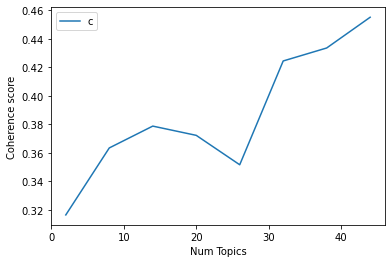

In [280]:
from matplotlib import pyplot as plt
# Show graph
limit=50; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [281]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3164
Num Topics = 8  has Coherence Value of 0.3634
Num Topics = 14  has Coherence Value of 0.3787
Num Topics = 20  has Coherence Value of 0.3723
Num Topics = 26  has Coherence Value of 0.3516
Num Topics = 32  has Coherence Value of 0.4244
Num Topics = 38  has Coherence Value of 0.4335
Num Topics = 44  has Coherence Value of 0.4551


In [282]:
from pprint import pprint
# Select the model and print the topics
optimal_model = model_list[5]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(20,
  '0.029*"constructor" + 0.018*"connect" + 0.018*"core" + 0.017*"asp_net" + '
  '0.016*"runtim" + 0.015*"chang" + 0.015*"work" + 0.015*"possibl" + '
  '0.015*"lead" + 0.015*"mismatch"'),
 (31,
  '0.032*"flatlist" + 0.020*"pass" + 0.019*"wall" + 0.016*"bounc" + '
  '0.016*"data" + 0.016*"state" + 0.016*"face" + 0.011*"leav" + 0.010*"ball" + '
  '0.010*"code"'),
 (9,
  '0.033*"imag" + 0.022*"record" + 0.021*"div" + 0.020*"banner" + '
  '0.020*"splice" + 0.020*"resiz" + 0.020*"hostnam" + 0.019*"input" + '
  '0.019*"patch" + 0.017*"array"'),
 (6,
  '0.032*"graph" + 0.027*"restor" + 0.026*"hashmap" + 0.026*"code" + '
  '0.023*"train" + 0.021*"shape" + 0.020*"network" + 0.019*"checkpoint" + '
  '0.019*"error" + 0.016*"method"'),
 (19,
  '0.025*"function" + 0.023*"array" + 0.023*"memori" + 0.016*"statement" + '
  '0.015*"test" + 0.014*"exec" + 0.013*"variabl" + 0.013*"code" + 0.012*"run" '
  '+ 0.011*"return"'),
 (14,
  '0.051*"run" + 0.051*"lsp" + 0.034*"error" + 0.018*"tri" + 0.017*"t

In [283]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.9641,"chang, class, type, run, keystor, clang, function, array, access, code","How do I specify the keystore type on the command line? In the java.security file, you can specify the keystore.type value. However, that looks like it changes the default keystore type for all JVM instances. I just want to change it for one instance.\nCurrently, it is set to ""jks"", but I need it to be ""jceks"". I tried but that doesn't seem to do what I want it to do.\nWhat's the right way to do this?"
1,1,25.0,0.9641,"mm, nvidia, solv, origin, problem, error, help, go, request, describ","Cross-Origin Request Blocked: The Same Origin Policy disallows reading the remote resource not working I'm new to Laravel and have gone through several solutions on tackoverflow, but to no avail. It's still showing the same error of Cross-Origin Request Blocked.\n\nI also included this:\n\non my app.blade.php, but it still didn't work."
2,2,18.0,0.9769,"interpol, number, templat, append, page, event, convers, degre, implicit, handler","form submit event handler refreshes the page + jQuery I made a template in index.html \n\nwhich is going to be used to append in another div five times.\n\nand the value of is passed to the on window load.\napp.js:\n\nAs a result it generates five templates and each template contains value of price. Now, when I click on submit button it is not triggering the event handler I set in . \n\nBut instead it refreshes the page and appends question mark on the url. ex: \nWhat's the problem here?"
3,3,2.0,0.8924,"valu, loop, bar, navig, layout, list, add, xml, main, subset","If you want to change for every value in Subset, you could just do \n\nor if you are just updating a smaller set of values from subset"
4,4,10.0,0.8352,"type, code, time, valu, compon, trigger, login, loop, alarm, header","repeating set row values for unique column values the data format i have is as follows: \nWhen i use s2<- fill_(s1,c(""Time"")), it would use the last seen value..\nhowever i would like all values of time listed below to repeat for each value of Animal"
5,5,21.0,0.9677,"cursor, mous, data, record, array, splice, simpl, post, int, blog","Find the sum of weights of edges between every pair of nodes in a weighted tree I need to find an efficient way to find the sum of values of all simple paths in a weighted tree. The value of a simple path is defined as the sum of weights of all edges in the given simple path. \nThis is my try, but it is not working. Please tell the correct approach."
6,6,12.0,0.9579,"file, contain, text, folder, load, field, hyphen, packag, charact, data","Quickest way to load multiple csvs into a dataframe I have a folder which contains many csvs (100+) and each csv contains many rows.\nI am using the following code to load the csv into data frame, but it take a fair amount of time. What is the quickest way to load this data?"
7,7,12.0,0.9529,"file, contain, text, folder, load, field, hyphen, packag, charact, data","Your file almost certainly has actual U+00AD soft-hyphen characters in it.\nThese are characters that mark places where a word could be split when fitting lines to a page. The idea is that the soft hyphen is invisible if the word doesn't need to be split, but printed the same as a U+2010 normal hyphen if it does.\nSince you don't care about rendering this text in a book with nicely flowing text, you're never going to hyphenate anything, so you just want to remove these characters.\nThe way to do this is not to fiddle with the encoding. Just remove them from the Unicode text, using whichever of these you find most readable:\n\nNotice the single backslash. We're not replacing a literal backslash, , , , we're replacing a literal soft-hyphen character, that is, the character whose code point is hex 0xad.\nYou can either do this to the whole file before splitting into words, or do it once per word after splitting.\n\nMeanwhile, you seem to be confused abou

In [284]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9687,"code, licens, loop, set, variabl, user, valu, button, exit, exec",How to predict accuracy value for a single image? Train model using the below code\n\nBelow is m...
1,1.0,0.9462,"user, redirect, panel, substr, delimit, cpp, c++, support, form, struct","You can use delimiter to grab the substring, and use this substring to fill your struct, an exe..."
2,2.0,0.9869,"valu, loop, bar, navig, layout, list, add, xml, main, subset",Nested for loops not iterating Can anyone help me pinpoint why this for loop won't actually yiel...
3,3.0,0.9871,"click, compon, array, result, button, attach, link, problem, time, string",Darken the color of svg element each time on button click using D3 V3 or JavaScript I have a D3 ...
4,4.0,0.9869,"variabl, class, php, request, code, click, access, array, object, file","If there is no reason to run phx app as administrator, you could ""take"" ownership recursively o..."
5,5.0,0.9677,"string, valu, array, tabl, key, add, hash, convert, charact, variabl",How to add a value into an array of values in Hash Table Java I´m traying to add a value inside ...
6,6.0,0.9849,"graph, restor, hashmap, code, train, shape, network, checkpoint, error, method","errors about restoring the models after training I train a natural network with tensorflow, whil..."
7,7.0,0.9596,"case, fail, tdd, test, order, agil, interest, drama, observ, write",You write a failing test case in order to observe that the test case CAN fail. \nThis is dramat...
8,8.0,0.9677,"chang, class, type, run, keystor, clang, function, array, access, code","This isn't used much by compilers in my experience, but one use is that the compiler can assume..."
9,9.0,0.9775,"imag, record, div, banner, splice, resiz, hostnam, input, patch, array","Unable to give hostname as input parameter in groovy to run ansible playbook stage(""Applying Pat..."


In [285]:
import numpy as np
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

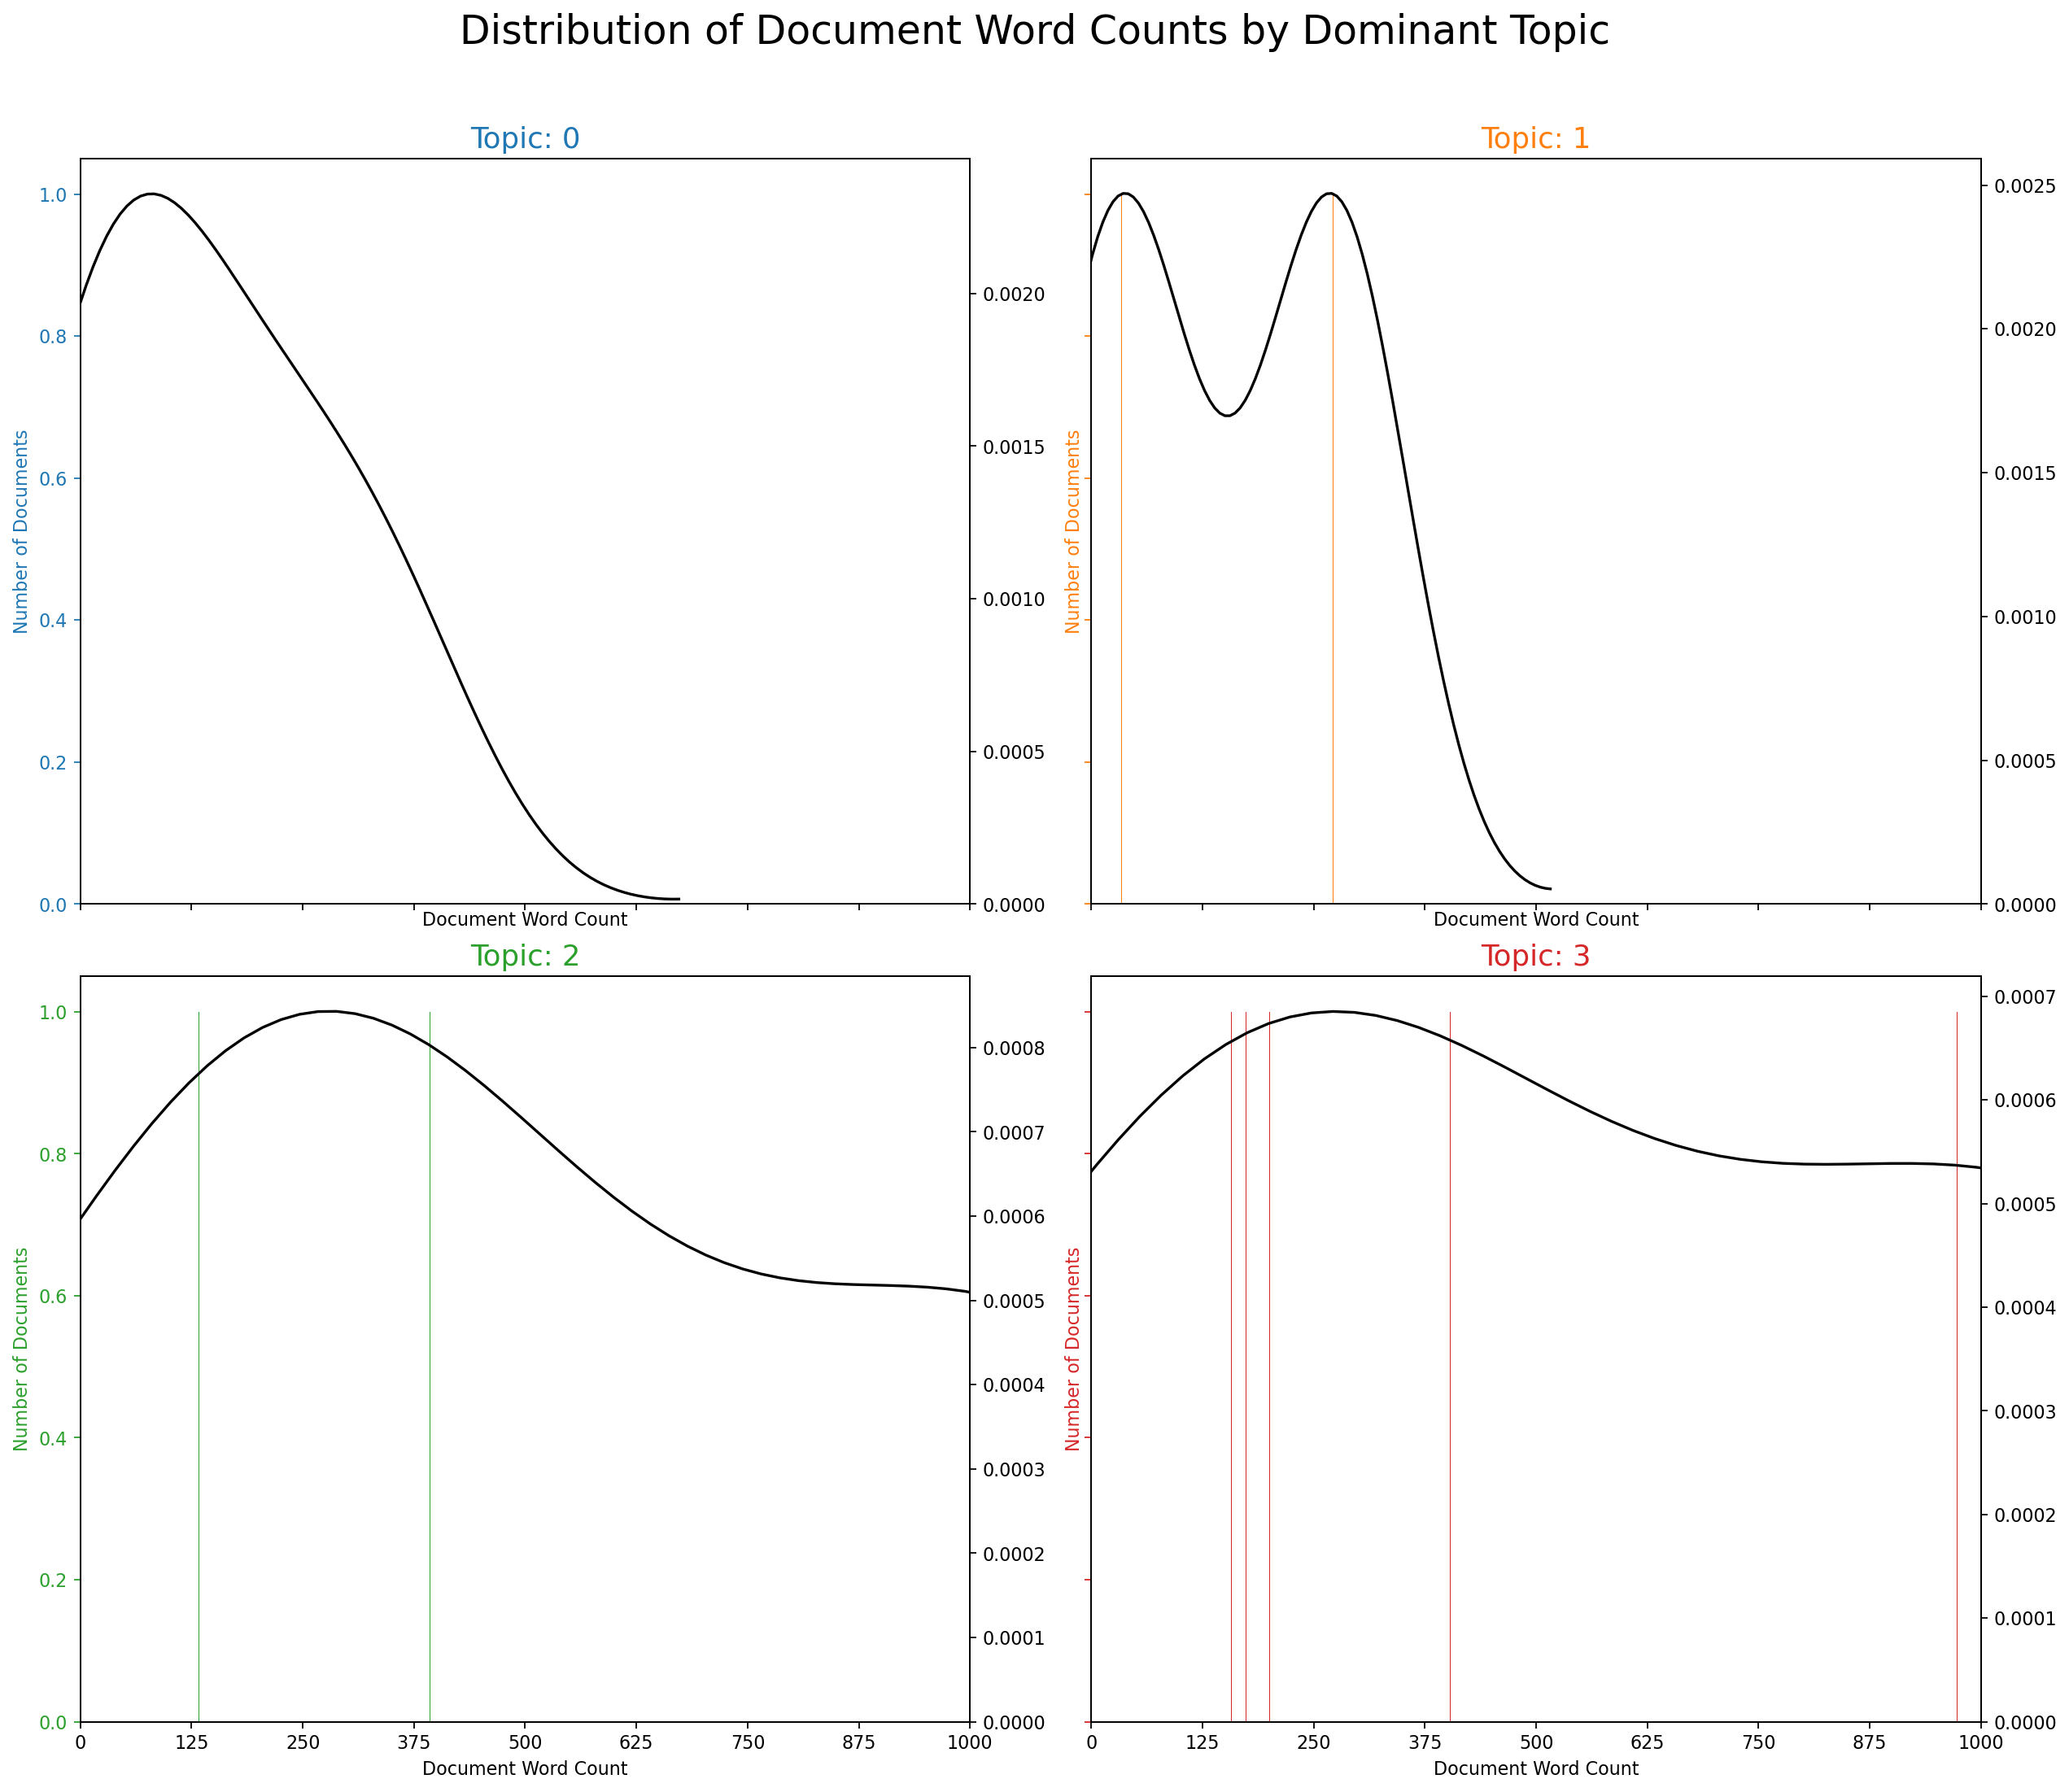

In [286]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

In [287]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS_CUSTOM,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = optimal_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

NameError: name 'stop_words' is not defined

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, dictionary=optimal_model.id2word)
vis